In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv("personality_datasert.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.shape

(2900, 8)

In [4]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [5]:
df.duplicated().sum()

402

In [6]:
df.duplicated(['Stage_fear']).sum()

2898

In [7]:
df.duplicated()/len(df)*100

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2895    0.034483
2896    0.000000
2897    0.000000
2898    0.000000
2899    0.000000
Length: 2900, dtype: float64

In [8]:
df.nunique()

Time_spent_Alone             13
Stage_fear                    2
Social_event_attendance      12
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          17
Post_frequency               12
Personality                   2
dtype: int64

In [9]:
for column in df.columns:
    duplicates = df[column][df[column].duplicated()]
    if not duplicates.empty:
        print(f"Column: {column}")
        print("Duplicate values:")
        print(duplicates.unique())
        print("------")

Column: Time_spent_Alone
Duplicate values:
[ 9.        4.        0.        3.       10.        1.        2.
  5.        6.        8.        7.        4.505816 11.      ]
------
Column: Stage_fear
Duplicate values:
['Yes' 'No']
------
Column: Social_event_attendance
Duplicate values:
[ 9.          1.          8.          6.          3.          4.
  0.          7.          5.          2.         10.          3.96335447]
------
Column: Going_outside
Duplicate values:
[4. 3. 6. 7. 0. 5. 1. 2.]
------
Column: Drained_after_socializing
Duplicate values:
['Yes' 'No']
------
Column: Friends_circle_size
Duplicate values:
[ 7.          0.         13.         14.          8.         10.
  4.          1.         15.          6.         12.          2.
  5.          3.          9.         11.          6.26886291]
------
Column: Post_frequency
Duplicate values:
[ 5.          8.          3.          7.          0.          2.
  6.          9.         10.          1.          4.          3.56472663]


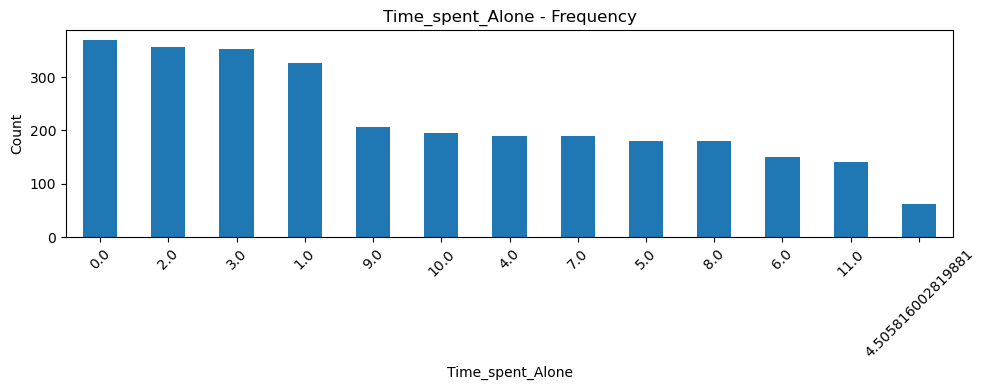

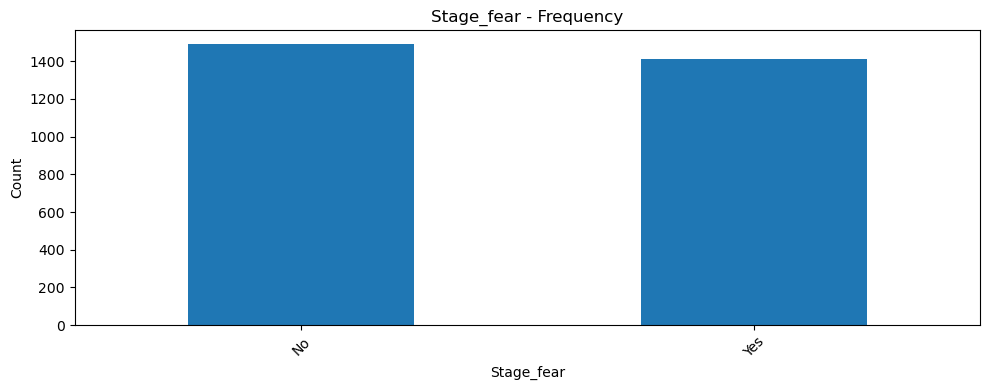

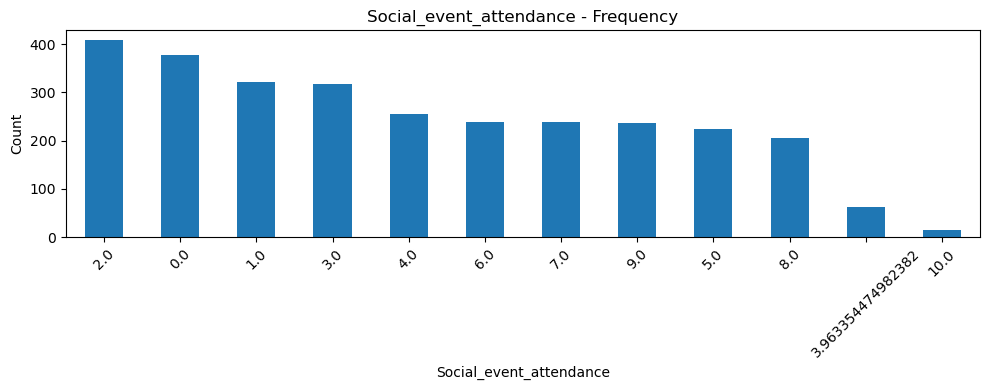

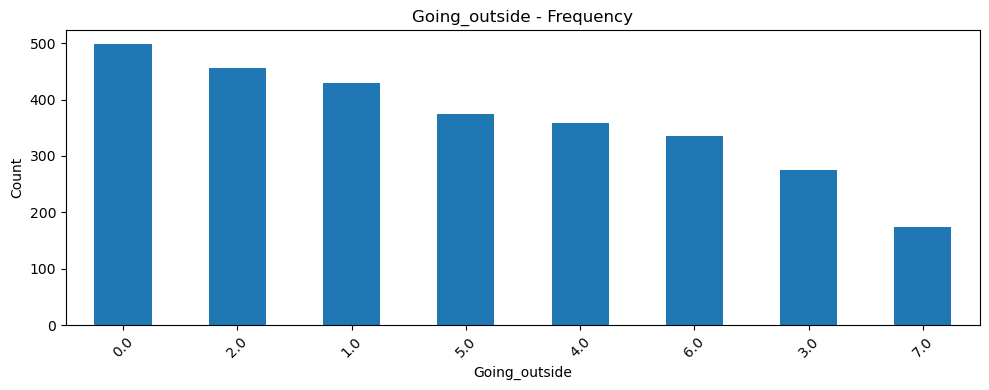

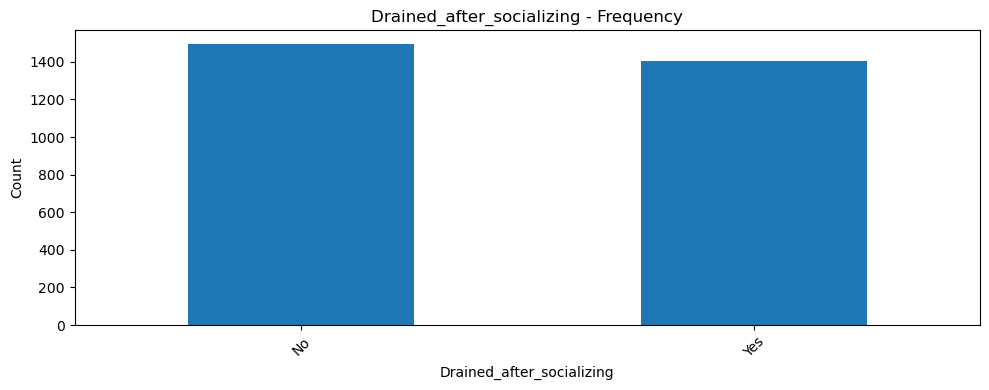

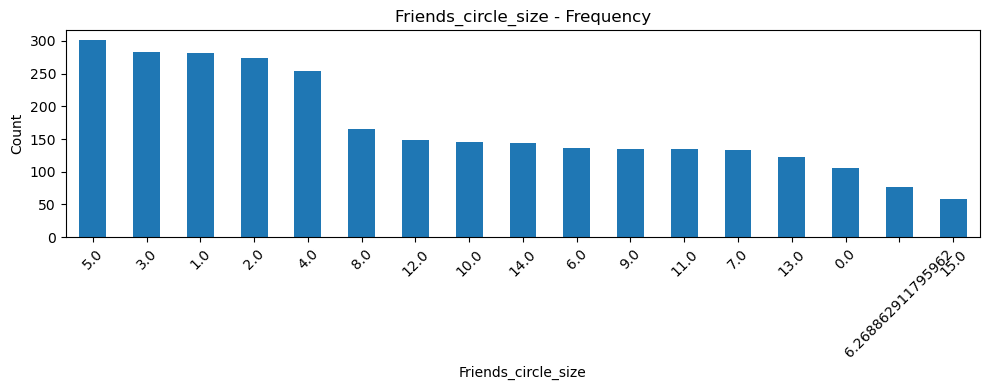

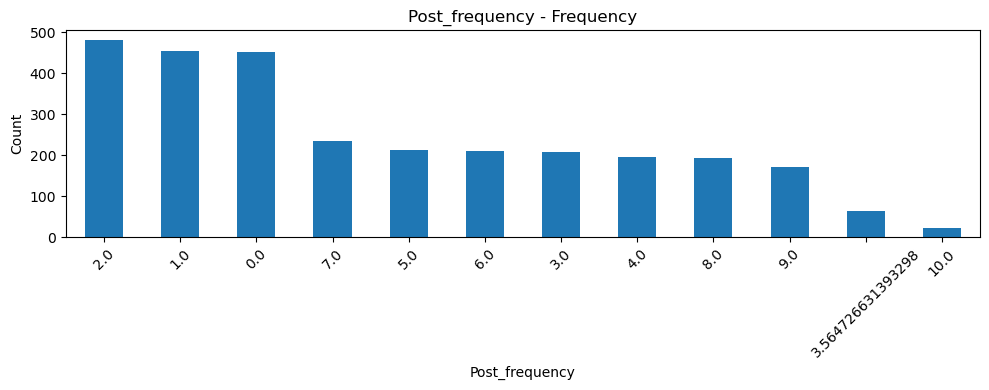

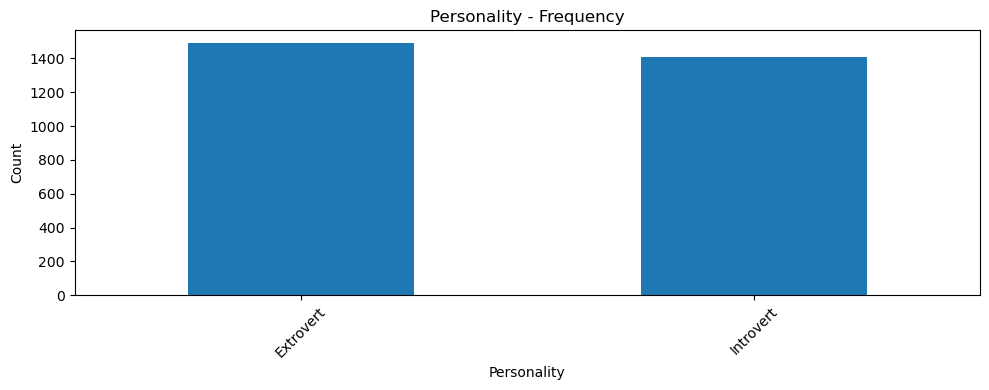

In [10]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"{column} - Frequency")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
duplicates_df = df[df.duplicated()]
print(duplicates_df)


      Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
47                10.0        Yes                      1.0            2.0   
217                5.0        Yes                      2.0            0.0   
246                9.0        Yes                      0.0            1.0   
248                9.0        Yes                      0.0            2.0   
254                7.0        Yes                      0.0            0.0   
...                ...        ...                      ...            ...   
2884              11.0        Yes                      0.0            2.0   
2890               8.0        Yes                      2.0            0.0   
2891               6.0        Yes                      3.0            1.0   
2892               9.0        Yes                      2.0            0.0   
2895               3.0         No                      7.0            6.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
47  

In [12]:
# Get all duplicate rows including the first occurrences
duplicates_all_df = df[df.duplicated(keep=False)]

# Display the DataFrame of duplicates
duplicates_all_df.reset_index(drop=True, inplace=True)
duplicates_all_df  # Show the first 10 rows as a sample

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
1,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
2,3.0,No,6.0,4.0,No,10.0,7.0,Extrovert
3,10.0,Yes,3.0,1.0,Yes,2.0,1.0,Introvert
4,9.0,Yes,2.0,2.0,Yes,1.0,0.0,Introvert
...,...,...,...,...,...,...,...,...
726,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
727,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
728,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
729,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2498 non-null   float64
 1   Stage_fear                 2498 non-null   object 
 2   Social_event_attendance    2498 non-null   float64
 3   Going_outside              2498 non-null   float64
 4   Drained_after_socializing  2498 non-null   object 
 5   Friends_circle_size        2498 non-null   float64
 6   Post_frequency             2498 non-null   float64
 7   Personality                2498 non-null   object 
dtypes: float64(5), object(3)
memory usage: 175.6+ KB


In [17]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,4.232128,4.200867,3.192954,6.580130,3.815283
std,3.406630,2.874305,2.218807,4.257516,2.914253
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,6.000000,3.000000
75%,7.000000,7.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [18]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])


In [19]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [20]:
x=df.drop('Personality',axis=1)
y=df['Personality']

In [21]:
x.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0


In [106]:
from sklearn.preprocessing import StandardScaler
features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
            'Going_outside', 'Drained_after_socializing',
            'Friends_circle_size', 'Post_frequency']

# Save the scaler using a DataFrame with column names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])  # or X[features]

# Save scaler, model, and feature names
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)


In [108]:
x.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,-0.068154,0,-0.069897,1.265368,0,1.508193,0.406606
1,1.399866,1,-1.461817,-1.439329,1,-1.545842,-0.279813
2,1.399866,1,-1.113837,-0.537763,1,-0.371213,-0.623023
3,-1.242570,0,0.626062,1.716151,0,1.743119,1.436236
4,-0.361758,0,1.670001,0.363802,0,0.333564,0.406606


In [110]:
y.value_counts()

Personality
0    1403
1    1095
Name: count, dtype: int64

In [112]:
y.value_counts(normalize=True)

Personality
0    0.561649
1    0.438351
Name: proportion, dtype: float64

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [117]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [120]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print(classification_report(y_train,y_pred_train))
print()
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1124
           1       0.97      1.00      0.98       874

    accuracy                           0.99      1998
   macro avg       0.98      0.99      0.99      1998
weighted avg       0.99      0.99      0.99      1998


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       279
           1       0.85      0.88      0.87       221

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [122]:
print(accuracy_score(y_train,y_pred_train))
print()
print(accuracy_score(y_test,y_pred_test))

0.9854854854854855

0.88


In [124]:
print(confusion_matrix(y_train,y_pred_train))
print()
print(confusion_matrix(y_test,y_pred_test))

[[1098   26]
 [   3  871]]

[[246  33]
 [ 27 194]]


In [126]:
from sklearn.model_selection import cross_val_score
trainig_accuracy=cross_val_score(rf,x_train,y_train,cv=10)
print("Cross Validation for trainig data(avg):",trainig_accuracy.max())

Cross Validation for trainig data(avg): 0.95


In [127]:
from sklearn.metrics import roc_auc_score
rf_roc_auc=roc_auc_score(y_test,y_pred_test)
rf_roc_auc

0.8797742422030848

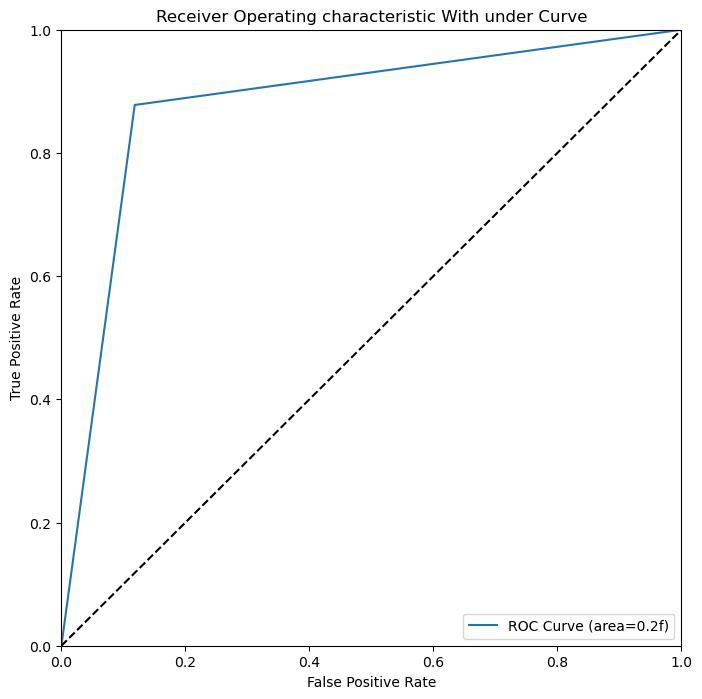

In [128]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label='ROC Curve (area=0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating characteristic With under Curve")
plt.legend(loc="lower right")
plt.show()